In [ ]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")#下载该数据集
#print(mnist.DESCR)#显示下载的网址
x,y = mnist.data,mnist.target
#print(x.shape)#70000个数据，前60000为训练样本，后10000为测试样本,28*28
x_train = np.array(x[:60000],dtype=float)
y_train = np.array(y[:60000],dtype=float)
x_test = np.array(x[60000:],dtype=float)
y_test = np.array(y[60000:],dtype=float)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
#knn_clf.fit(x_train,y_train)

from sklearn.decomposition import PCA
pca =PCA(0.90)
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)
knn_clf.fit(x_train_reduction,y_train)
knn_clf.score(x_test_reduction,y_test)#准确率反而提高，因为PCA还有降噪功能

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
plot_decision_boundary(knn_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [ ]:
pca2 =PCA(n_components=64)
pca2.fit(x_train)
x_train_reduction = pca2.transform(x_train)

ram = np.random.randint(0,60000)
some_digit = x_train_reduction[ram]
print(y_train[ram])
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap = mpl.cm.binary)
plt.show()

0.0


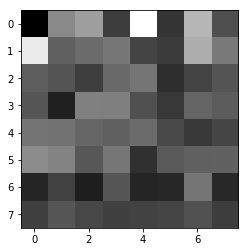

<Figure size 432x288 with 0 Axes>

8.0


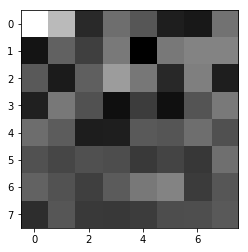

<Figure size 432x288 with 0 Axes>

9.0


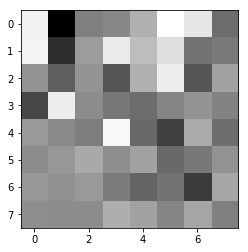

<Figure size 432x288 with 0 Axes>

4.0


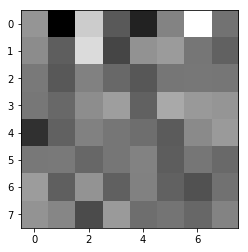

<Figure size 432x288 with 0 Axes>

2.0


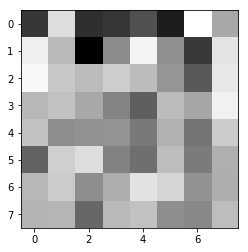

<Figure size 432x288 with 0 Axes>

0.0


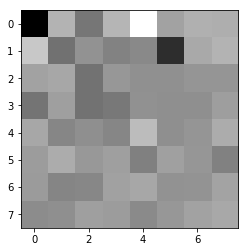

<Figure size 432x288 with 0 Axes>

3.0


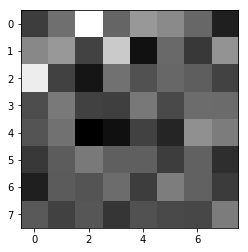

<Figure size 432x288 with 0 Axes>

5.0


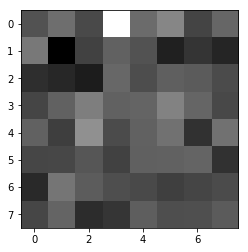

<Figure size 432x288 with 0 Axes>

9.0


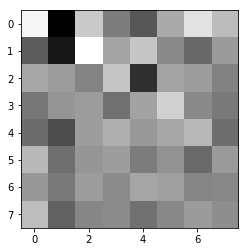

<Figure size 432x288 with 0 Axes>

4.0


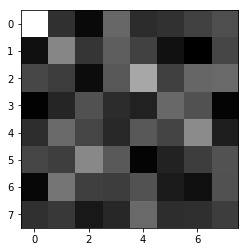

<Figure size 432x288 with 0 Axes>

In [3]:
ram = np.random.randint(0,60000,10)
some_digit = x_train_reduction[ram]

import matplotlib as mpl
import matplotlib.pyplot as plt
index=0
for some_digit_image in some_digit:
    some_digit_image = some_digit_image.reshape(8,8)
    plt.imshow(some_digit_image,cmap = mpl.cm.binary)
    print(y_train[ram[index]])
    index=index+1
    plt.figure()
    plt.show()